# TPR : From symbols to tensors

__(Cho, Goldrick & Smolensky 2016)__

## Data

This notebook tries to illustrate how to use Tensor Product Representation (TPR) to represent discrete or gradient blend structures. The concrete examples apply TPR to root allomorphy. In Sanskrit and Greek, for instance, we have a phenomenon known as Grassmann's law : no two aspirated stops are allowed in the same root. If a root happens to have two aspirates, we typically observe alternations:

The root $bud^h$ (*a.o.* 'awake', 'know') can surface either as $b^hud-$ or $bud^h$ (e.g. 3sg pres. _bodhati_, 3sg future _bhotsyati_).

The problem has attracted the attention of many scholars due to impossibility to model this phenomenon through phonological rules, which would lead to ordering paradoxes and a number of other open issues related to this phenomenon.

GSC offers a solution if we take into account the possibility that both the aspirated and plain variants of the consonants were underlying represented and the UR as whole is a gradient blend of the two segments/or possibly features.

$$b^hud-/bud^h = [\alpha \cdot b^h + \beta \cdot b] \, u \, [\gamma \cdot d + \delta \cdot d^h]$$

In [3]:
# Imports
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set seed for reproducibility
# torch.manual_seed(111)

## The TPR Representation

In matrix language the **Tensor Product Representation** of a structure $s$ can be expressed as:

$$T_s = F \times B \times R^T$$

the chain product of the filler matrix, times the binding matrix times the role matrix.

**Ex**:
Let's suppose we have the input *budh*. This can be decomposed into

$$b \otimes r_1 + u \otimes r_2 + dh \otimes r_3$$

Now suppose that our language also consists of the additional fillers "bh" and "d". The set of fillers could be:

["bh", "b", "u", "d", "dh", "_"]

(the last filler representing the empty filler (I've used it occasionally to pad shorter strings or to explicitely prefer simple over complex codas)

The binding matrix for *budh* would be:


In [4]:
fillers = ["bh", "b", "u", "d", "dh", "_"]
roles = ["pos1", "pos2", "pos3"]
# 3 cols : 3 positions for the roots (initial, middle, final) and 6 rows, one for each filler
budh = torch.tensor([[0., 0., 0.],
                     [1., 0., 0.],
                     [0., 1., 0.],
                     [0., 0., 0.],
                     [0., 0., 1.],
                     [0., 0., 0.]])
print(pd.DataFrame(budh.numpy(), index=fillers, columns=roles))

    pos1  pos2  pos3
bh   0.0   0.0   0.0
b    1.0   0.0   0.0
u    0.0   1.0   0.0
d    0.0   0.0   0.0
dh   0.0   0.0   1.0
_    0.0   0.0   0.0


<AxesSubplot:>

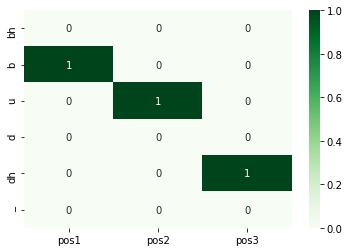

In [11]:
df = pd.DataFrame(budh.numpy(), index=fillers, columns=roles)
sns.heatmap(df, annot=True, cmap="Greens")

The role and the filler matrices can be built in different ways. The following examples were built using random components, chosen so that the column vectors build a set of linearly independent vectors and their pairwise dotproduct is 0 (maximally different).

In [5]:
R = torch.tensor([[ 0.4311,  0.8892, -0.1533],[-0.3264,  0.3121,  0.8922],[ 0.8412, -0.3346,  0.4248]])
F = torch.tensor([[ 0.2958, -0.3054,  0.0164,  0.2841,  0.4751,  0.7159],
        [ 0.1613, -0.2552,  0.7667,  0.1514,  0.3030, -0.4542],
        [ 0.5245,  0.4364,  0.4019,  0.0709, -0.5345,  0.2867],
        [-0.3085,  0.6143,  0.2897, -0.4018,  0.4824,  0.2222],
        [ 0.6668,  0.3079, -0.4022, -0.0627,  0.3952, -0.3724],
        [-0.2674,  0.4232, -0.0681,  0.8520,  0.0888, -0.1045]])

print(f"Roles matrix:\n{R}\n\n")
print(f"Fillers matrix:\n{F}")

Roles matrix:
tensor([[ 0.4311,  0.8892, -0.1533],
        [-0.3264,  0.3121,  0.8922],
        [ 0.8412, -0.3346,  0.4248]])


Fillers matrix:
tensor([[ 0.2958, -0.3054,  0.0164,  0.2841,  0.4751,  0.7159],
        [ 0.1613, -0.2552,  0.7667,  0.1514,  0.3030, -0.4542],
        [ 0.5245,  0.4364,  0.4019,  0.0709, -0.5345,  0.2867],
        [-0.3085,  0.6143,  0.2897, -0.4018,  0.4824,  0.2222],
        [ 0.6668,  0.3079, -0.4022, -0.0627,  0.3952, -0.3724],
        [-0.2674,  0.4232, -0.0681,  0.8520,  0.0888, -0.1045]])


*budh* can be then represented as:

In [6]:
tpr_budh = F.matmul(budh).matmul(R.T)
tpr_budh

tensor([[-0.1899,  0.5287, -0.0606],
        [ 0.5253,  0.5929, -0.3425],
        [ 0.6274, -0.4939,  0.0056],
        [ 0.4485,  0.3203,  0.6247],
        [-0.2855,  0.1266,  0.5615],
        [ 0.1083, -0.0802,  0.4165]])

<AxesSubplot:>

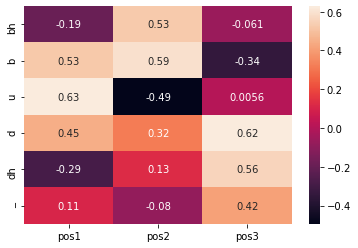

In [9]:
df = pd.DataFrame(tpr_budh.numpy(), index=fillers, columns=roles)
sns.heatmap(df, annot=True)

Notice that even though this representation is now distributed, we can always retrieve (unbind) the original fillers using matrix multiplication:

$$TPR \times (R^T)^{-1} = F$$

In [12]:
tpr_budh.matmul(torch.pinverse(R.T))

tensor([[-0.3054,  0.0164,  0.4751],
        [-0.2552,  0.7667,  0.3030],
        [ 0.4364,  0.4019, -0.5345],
        [ 0.6143,  0.2897,  0.4824],
        [ 0.3079, -0.4022,  0.3952],
        [ 0.4232, -0.0681,  0.0888]])

Compare this matrix with the Filler matrix:

In [13]:
F

tensor([[ 0.2958, -0.3054,  0.0164,  0.2841,  0.4751,  0.7159],
        [ 0.1613, -0.2552,  0.7667,  0.1514,  0.3030, -0.4542],
        [ 0.5245,  0.4364,  0.4019,  0.0709, -0.5345,  0.2867],
        [-0.3085,  0.6143,  0.2897, -0.4018,  0.4824,  0.2222],
        [ 0.6668,  0.3079, -0.4022, -0.0627,  0.3952, -0.3724],
        [-0.2674,  0.4232, -0.0681,  0.8520,  0.0888, -0.1045]])

The matrix we obtained by multiplying the TP representation with the inverse of the role matrix is a (6,3) matrix, where each column represent a role (in this example the position of the filler in the string) and the component of each column are exactly those of the second, third and fifth column of the filler matrix, corresponding resp. to the fillers "b", "u" and "dh".

## Blend Representations

The same procedure can be applied if the Binding matrix doesn't contain just 0s and 1s but some values between 0s and 1s, corresponding to partial activations of specific fillers.

So for instance the blend $(0.8 \cdot b + 0.7 \cdot bh)udh$ can be represented with the following binding matrix:

    pos1  pos2  pos3
bh   0.7   0.0   0.0
b    0.8   0.0   0.0
u    0.0   1.0   0.0
d    0.0   0.0   0.0
dh   0.0   0.0   1.0
_    0.0   0.0   0.0


<AxesSubplot:>

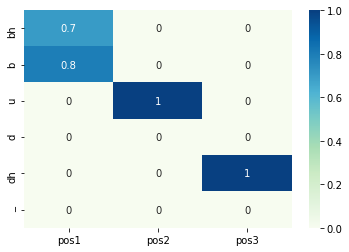

In [22]:
bbhudh = torch.tensor([[.7, 0, 0], [.8, 0, 0], [0,1,0],[0,0,0],[0,0,1],[0,0,0]])
bbhudh_df = pd.DataFrame(bbhudh.numpy(), index=fillers, columns=roles)
print(bbhudh_df)
sns.heatmap(bbhudh_df, annot=True, cmap="GnBu")


It's representation in the neural space will then be:

In [23]:
tpr_bbhudh = F @ bbhudh @ R.T
tpr_bbhudh

tensor([[-0.0743,  0.4412,  0.1650],
        [ 0.5960,  0.5394, -0.2046],
        [ 0.7481, -0.5852,  0.2410],
        [ 0.3024,  0.4309,  0.3397],
        [-0.1108, -0.0057,  0.9023],
        [-0.0089,  0.0086,  0.1878]])

<AxesSubplot:>

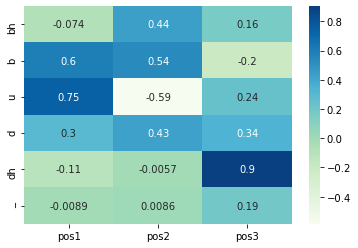

In [33]:
blend_df = pd.DataFrame(tpr_bbhudh.numpy(), index=fillers, columns=roles)
sns.heatmap(blend_df, annot=True, cmap="GnBu")

The same holds here as before. We can go back to the local representation using the matrix multiplication.

In [24]:
bbhudh_fillers = tpr_bbhudh.matmul(torch.pinverse(R.T))
print(f"bbhudh_fillers :\n{bbhudh_fillers}\n\n")
print(f"Filler Matrix :\n{F}\n")

bbhudh_fillers :
tensor([[-0.0373,  0.0164,  0.4751],
        [-0.0912,  0.7667,  0.3030],
        [ 0.7163,  0.4019, -0.5345],
        [ 0.2755,  0.2897,  0.4824],
        [ 0.7131, -0.4022,  0.3952],
        [ 0.1514, -0.0681,  0.0888]])


Filler Matrix :
tensor([[ 0.2958, -0.3054,  0.0164,  0.2841,  0.4751,  0.7159],
        [ 0.1613, -0.2552,  0.7667,  0.1514,  0.3030, -0.4542],
        [ 0.5245,  0.4364,  0.4019,  0.0709, -0.5345,  0.2867],
        [-0.3085,  0.6143,  0.2897, -0.4018,  0.4824,  0.2222],
        [ 0.6668,  0.3079, -0.4022, -0.0627,  0.3952, -0.3724],
        [-0.2674,  0.4232, -0.0681,  0.8520,  0.0888, -0.1045]])



Notice that nothing changed as for the representation of the second and third position in the string:

In [25]:
assert torch.allclose(F[:,2],bbhudh_fillers[:,1])
assert torch.allclose(F[:,4],bbhudh_fillers[:,2])

But the first column in our representation is now a blend of the first and second column in the Matrix of fillers. How much of the first and second filler went into the representation of the first element of the blend representation is revealed using the dot product between those vectors

In [26]:
torch.dot(F[:,0],bbhudh_fillers[:,0])

tensor(0.7000)

In [27]:
torch.dot(F[:,1],bbhudh_fillers[:,0])

tensor(0.8001)

Notice also that the similarity with other fillers is close to 0, which guarantees that we can always unbind the representations.

In [28]:
torch.dot(F[:,2],bbhudh_fillers[:,0])

tensor(-3.8743e-06)

In [29]:
torch.dot(F[:,3],bbhudh_fillers[:,0])

tensor(-4.3511e-05)

In [30]:
torch.dot(F[:,4],bbhudh_fillers[:,0])

tensor(-4.8921e-05)

## Heat map visualization of blends and pure representations

In [16]:
sns.set_theme(style="darkgrid")

In [17]:
roles = ["pos1", "pos2", "pos3"]
fillers = ["bh", "b", "u", "d", "dh", "_"]

## Discrete structure

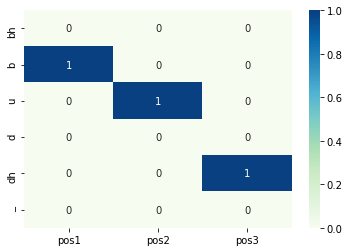

In [31]:
# Purely local representation
budh_heat = sns.heatmap(budh, 
                        cmap="GnBu",
                        annot=True, 
                        xticklabels=roles,
                       yticklabels=fillers)

<AxesSubplot:>

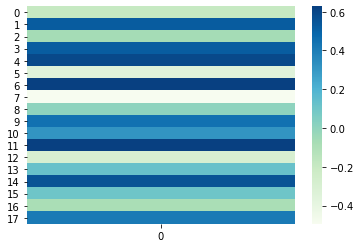

In [34]:
# Distributed representation
sns.heatmap(tpr_budh.reshape((18,1)),
            cmap="GnBu")

Each row in this distributed representation represent a binding (1 role, 1 filler). We had 6 possible fillers and 3 possible positions, hence we get 18 possible bindings (rows 0-17).

### Gradient structures

<AxesSubplot:>

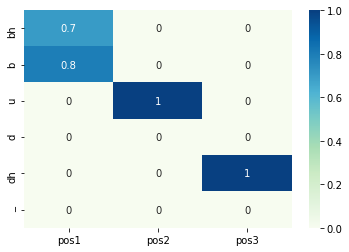

In [35]:
# Blend representation (discrete)
sns.heatmap(bbhudh,
            cmap="GnBu",
            annot=True,
            xticklabels=roles,
            yticklabels=fillers)

<AxesSubplot:>

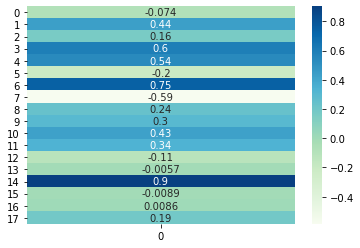

In [36]:
# Blend representation (distributed)
sns.heatmap(tpr_bbhudh.reshape((18,1)),
            cmap="GnBu",
            annot=True)